In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as sm
from scipy.stats import pearsonr
from scipy.optimize import minimize
import random

In [130]:
data = pd.read_csv('test_datasetOG.csv')
print(data.shape)
data.head()

(2278, 10)


,id,name,cost_price,selling_price,variant,stock,manufacture_date,expiry_date,best_before_months,expiry_in_months
0,0,Shampoo,179,189,340 ml,230,11-10-2020,12-10-2021,9,3
1,1,Body_Wash,200,360,800 ml,491,12-10-2020,13-10-2022,24,9
2,2,Oil,167,180,1 L,783,13-10-2020,14-10-2021,9,2
3,3,Besan,19,64,500 g,793,14-10-2020,15-10-2021,6,1
4,4,Colgate,75,99,10 g,817,15-10-2020,16-10-2022,24,3


In [131]:
x= data['expiry_in_months'].values
y=data['selling_price'].values
print(x.shape)
print(y.shape,'y')

(2278,)
(2278,) y


In [132]:
mean_x=np.mean(x)
mean_y=np.mean(y)

n= len(x)

num=0
den=0
for i in range(n):
    num +=(x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
b1= num/den
b0=mean_y-(b1*mean_x)

print(b1,b0)

3.114705502689951 265.31830587886293


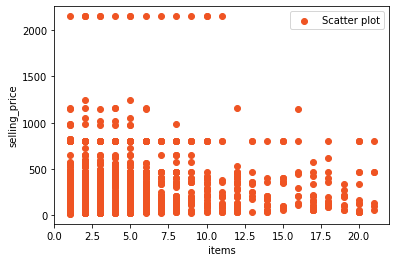

In [37]:
max_x =np.max(x)+100
min_x = np.min(x)-100

x1=np.linspace(min_x,max_x,1000)

y1=b0+b1*x

#plt.plot(x1,y1, colour='#58b970', label='Regression Line')
plt.scatter(x,y, color='#ef5423', label='Scatter plot')

plt.xlabel('items')
plt.ylabel('selling_price')
plt.legend()
plt.show()


In [133]:
data=data[pd.to_numeric(data['stock'], errors='coerce').notnull()]
data=data[pd.to_numeric(data['cost_price'], errors='coerce').notnull()]
data=data[pd.to_numeric(data['selling_price'], errors='coerce').notnull()]
#data=data[pd.to_numeric(data['variant'], errors='coerce').notnull()]
data=data[pd.to_numeric(data['best_before_months'], errors='coerce').notnull()]
data=data[pd.to_numeric(data['expiry_in_months'], errors='coerce').notnull()]

data['variant']=data['variant'].apply(lambda x: re.sub("[^0-9]", "", str(x))) #remove non numeric parts


In [134]:
data['expiry_in_months'] = minimize(lambda x: abs(0.8 - pearsonr(data['selling_price'], x)[0]), 
                             np.random.rand(len(data['selling_price']))).x
data['expiry_in_months']=(data['expiry_in_months'].abs())*12
data['competitor_selling_price']=data['selling_price']

In [135]:
data

,id,name,cost_price,selling_price,variant,stock,manufacture_date,expiry_date,best_before_months,expiry_in_months,competitor_selling_price
0,0,Shampoo,179,189,340,230,11-10-2020,12-10-2021,9,8.869480,189
1,1,Body_Wash,200,360,800,491,12-10-2020,13-10-2022,24,4.026865,360
2,2,Oil,167,180,1,783,13-10-2020,14-10-2021,9,4.796920,180
3,3,Besan,19,64,500,793,14-10-2020,15-10-2021,6,2.459275,64
4,4,Colgate,75,99,10,817,15-10-2020,16-10-2022,24,2.572224,99
...,...,...,...,...,...,...,...,...,...,...,...
1004,1004,DOVE Deeply Nourishing Body Wash,300,360,800,492,12-07-2023,12-07-2024,18,2.772405,360
1005,1005,Bingo Mad Angles Very Peri Peri Chips,40,50,130,238,13-07-2023,13-07-2024,9,5.606508,50
1006,1006,DETTOL Refresh Body Wash and Shower Gel,160,200,250,518,14-07-2023,14-07-2024,8,2.640215,200
1007,1007,PARLE 20-20 Butter Cookies,10,20,150,642,15-07-2023,15-07-2024,8,1.935109,20


In [167]:
for i in (data.index):
  data['competitor_selling_price'][i]= random.randint(data['selling_price'][i]-20, data['selling_price'][i]+10)

<ipython-input-167-de74ac91d932>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['competitor_selling_price'][i]= random.randint(data['selling_price'][i]-20, data['selling_price'][i]+10)


In [168]:
data['estimated_difference']=data['selling_price']- data['competitor_selling_price']

In [169]:
data['estimated_difference']

0       -2
1        7
2       11
3       11
4       19
        ..
1004    17
1005     1
1006    -8
1007    12
1008     3
Name: estimated_difference, Length: 976, dtype: int64

In [171]:
X=data.iloc[:,2:11]
X=X.drop(labels={'manufacture_date','expiry_date','selling_price','competitor_selling_price'},axis=1)
y=data['estimated_difference']
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

display(X)

,cost_price,variant,stock,best_before_months,expiry_in_months
0,179,340.0,230,9,8.869480
1,200,800.0,491,24,4.026865
2,167,1.0,783,9,4.796920
3,19,500.0,793,6,2.459275
4,75,10.0,817,24,2.572224
...,...,...,...,...,...
1004,300,800.0,492,18,2.772405
1005,40,130.0,238,9,5.606508
1006,160,250.0,518,8,2.640215
1007,10,150.0,642,8,1.935109


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [173]:
sc = StandardScaler()
sc.fit(X_train)
X_train = pd.DataFrame(sc.transform(X_train) ,columns =X.columns)

In [175]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [176]:
X_train

,cost_price,variant,stock,best_before_months,expiry_in_months
0,-0.736273,-0.284673,0.320673,-1.425535,0.077382
1,-0.631615,-0.313812,1.528876,0.317977,-0.864308
2,1.334134,-0.313812,-1.080692,-0.205077,1.368640
3,0.879099,-0.342368,1.475851,-0.205077,1.550402
4,0.533273,-0.109843,1.786424,-1.425535,-0.640811
...,...,...,...,...,...
727,-0.804528,-0.240966,-0.353497,1.364084,-1.043397
728,-0.713521,1.492774,-1.554126,2.410191,-0.641289
729,0.424065,-0.337123,1.555388,1.364084,0.578516
730,-0.030970,-0.051566,-0.974643,2.410191,0.170969


In [193]:
test_df = pd.DataFrame(list(zip([110,110], [600,600], [65,65], [24,24],[12,1]))) 
test_df.columns=['cost_price','variant','stock','best_before_months','expiry_in_months']
test_df1 = pd.DataFrame(sc.transform(test_df) ,columns =test_df.columns)

In [185]:
prediction=model.predict(test_df1)

In [186]:
test_df.index

RangeIndex(start=0, stop=2, step=1)

In [192]:
print(test_df.loc[[0]],"   Predicted Price: ",test_df['cost_price'].loc[[0]]-prediction[0])
print(test_df.loc[[1]],"   Predicted Price: ",test_df['cost_price'].loc[[1]]-prediction[1])

   cost_price  variant  stock  best_before_months  expiry_in_months
0         110      600     65                  24              12.0    Predicted Price:  0    105.296312
Name: cost_price, dtype: float64
   cost_price  variant  stock  best_before_months  expiry_in_months
1         110      600     65                  24               0.3    Predicted Price:  1    103.288592
Name: cost_price, dtype: float64


In [194]:
X_test = pd.DataFrame(sc.transform(X_test) ,columns =X_test.columns)
y_pred=model.predict(X_test)


In [189]:
sm.mean_squared_error(y_test,y_pred=y_pred)

88.09528059636605

In [190]:
sm.r2_score(y_test,y_pred=y_pred)

-0.025098902199123696